In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

headers = ["Url", "Category","Position", "Title", "Location","Amount_Raised", "Goal", "Number_of_Donators",
           "Length_of_Fundraising", "FB_Shares", "GFM_hearts", "Text", "Latitude", "Longitude"]

df = pd.read_csv('GFM_data.csv', sep = '\t')


df.head()

/Users/vincentlee/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,Text
0,0,https://www.gofundme.com/f/justiceforjacobblake,Medical,0,Justice for Jacob Blake,"Kenosha, WI",2296580.0,3000000.0,72.9K,72 days 00:33:52.072310000,118K,72.5K,73.4K,On August 23rd my son was shot multiple times ...
1,0,https://www.gofundme.com/f/official-navajo-nat...,Medical,0,Official Navajo Nation COVID-19 Relief Fund,"Window Rock, AZ",1831590.0,1000000.0,22K,184 days 00:33:53.278684000,71.3K,21.5K,21.6K,\nThe Navajo Nation COVID-19 Fund has been est...
2,0,https://www.gofundme.com/f/Tommy-Rivers-Rest-Up,Medical,0,"Rest up, Tommy, we'll see you soon","Raised $105,973 from 1795 donations",652554.0,1000000.0,11K,110 days 00:33:55.164400000,20.8K,10.1K,10.2K,"First, thank you for being here. Tommy Rivers ..."
3,0,https://www.gofundme.com/f/brandon039s-medical...,Medical,1,OFFICIAL BRANDON SAENZ MEDICAL FUND,"Tyler, TX",570299.0,750000.0,24.7K,154 days 00:33:56.151397000,5.5K,24.3K,24.5K,My name is Melissa Green and I am the mother o...
4,0,https://www.gofundme.com/f/please-help-me-in-t...,Medical,1,PLEASE HELP ME IN THE BATTLE FOR MY LIFE,"New Milford, NJ",498256.0,600000.0,7.8K,20 days 00:33:59.899292000,6.6K,7.7K,7.9K,PLEASE HELP ME IN THE BATTLE FOR MY LIFE. My n...


## Cleaning the data

Cleaning Goal Variable First

In [2]:
def helper(x):
    ## if string will make it numeric
    if isinstance(x,str):
        x = x.replace(',','')
        ## replacing M with numbers
        if '.' in x and 'M' in x:
            x = x.replace('.','')
            x = x.replace('M','00000')
        return x
    ## if nan will just return
    else:
        return x
df['Goal'] = df['Goal'].apply(helper).astype(float)

Cleaning Number of Donators and sharing/heart stats

In [4]:
def helper(x):
    ## if string will make numeric
    if isinstance(x,str):
        x =  x.replace(',','')
        if x.isnumeric() == False:
            return np.NaN
        return x
    ## if nan will just return
    else:
        return x
df['Number_of_Donations'] = df['Number_of_Donations'].apply(helper).astype('float')

In [5]:
def helper(x):
    ## if string will make numeric
    if isinstance(x,str):
        x = x.replace(',','')
        ## if has ".1k" will change to numeric
        if '.' in x and 'k' in x:
            x = x.replace('.','')
            x = x.replace('k','00')
        ## if "k" will change to numeric
        if 'k' in x:
            x = x.replace('k','000')
        return x
    ## return nan
    else:
        return x
df['FB_Shares'] = df['FB_Shares'].apply(helper).astype(float)
df['GFM_hearts'] = df['GFM_hearts'].apply(helper).astype(float)

ValueError: could not convert string to float: '118K'

# Exploration

In [ ]:
grouped_df = df.groupby('Category')[['Amount_Raised','Goal','FB_Shares','GFM_hearts','Number_of_Donators']].mean()

In [ ]:
grouped_df['Amount_Raised'].sort_values().plot(kind = 'barh')
plt.title('Avg Amount Raised per Category')

In [ ]:
df['Amount_Raised'].describe()

In [ ]:
df['Reach Goal?'] = df['Amount_Raised'] < df['Goal']

In [ ]:
df['Reach Goal?'].value_counts().plot.pie()

In [ ]:
df['Goal'].describe()

In [ ]:
grouped_df['Goal'].sort_values().plot(kind = 'barh')
plt.title('Goal per Category')

In [ ]:
grouped_df['FB_Shares'].sort_values().plot(kind = 'barh')
plt.title('FB Shares per Category')

In [ ]:
grouped_df['GFM_hearts'].sort_values().plot(kind = 'barh')
plt.title('Hearts per Category')

# Geopandas 

In [140]:
from shapely.geometry import Point


In [144]:
df['geometry'] = df.apply(lambda x:Point(x['Longitude'], x['Latitude']) ,axis = 1)

In [147]:
gdf = gpd.GeoDataFrame(df, geometry = 'geometry')

In [156]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us = world[world['name'] == 'United States of America']

Text(0.5, 1, 'Amount Raised per Fundraiser')

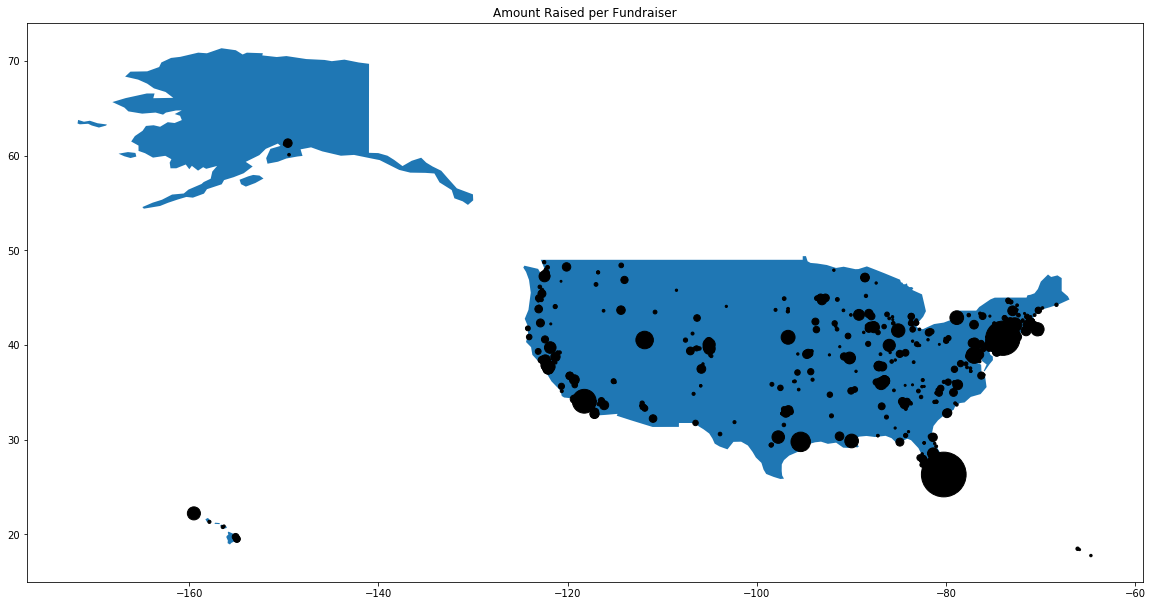

In [167]:
base = us.plot(figsize = (20,20))
## creating scales
x_max = gdf['Amount_Raised'].max()
x_min = gdf['Amount_Raised'].min()
max_size = 2000
min_size = 2
## adding circles
gdf.plot(ax=base, marker='o', color='black', markersize=min_size + (max_size-min_size)*(gdf['Amount_Raised']/x_max));
plt.title('Amount Raised per Fundraiser')



Text(0.5, 1, 'GFM_hearts per Fundraiser')

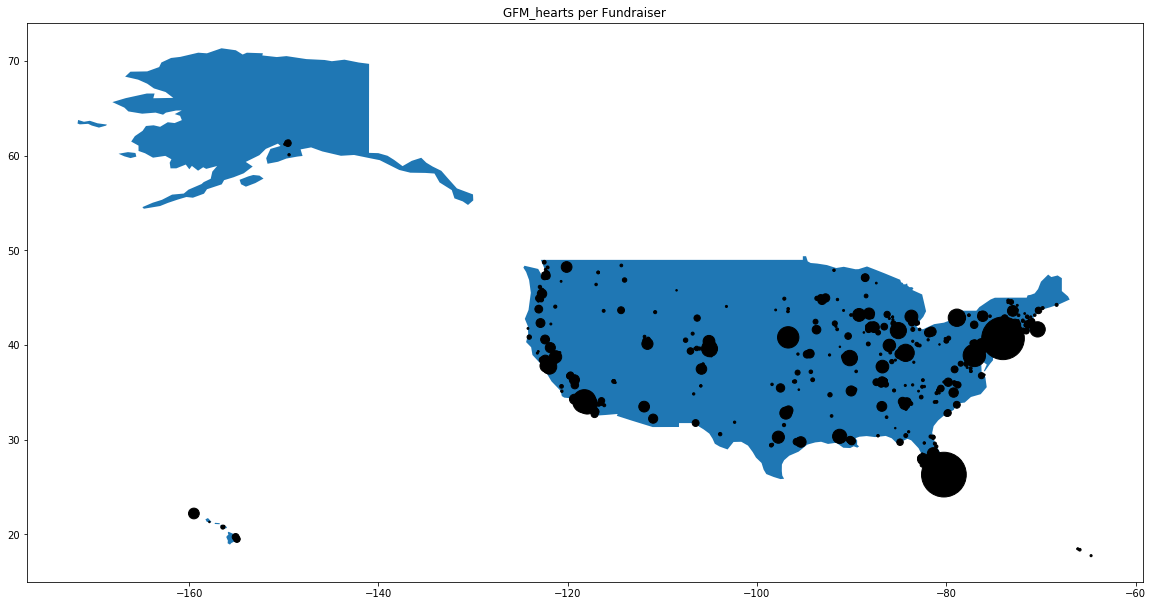

In [169]:
base = us.plot(figsize = (20,20))
## creating scales
x_max = gdf['GFM_hearts'].max()
x_min = gdf['GFM_hearts'].min()
max_size = 2000
min_size = 2
## adding circles
gdf.plot(ax=base, marker='o', color='black', markersize=min_size + (max_size-min_size)*(gdf['GFM_hearts']/x_max));
plt.title('GFM_hearts per Fundraiser')


Text(0.5, 1, 'FB_Shares per Fundraiser')

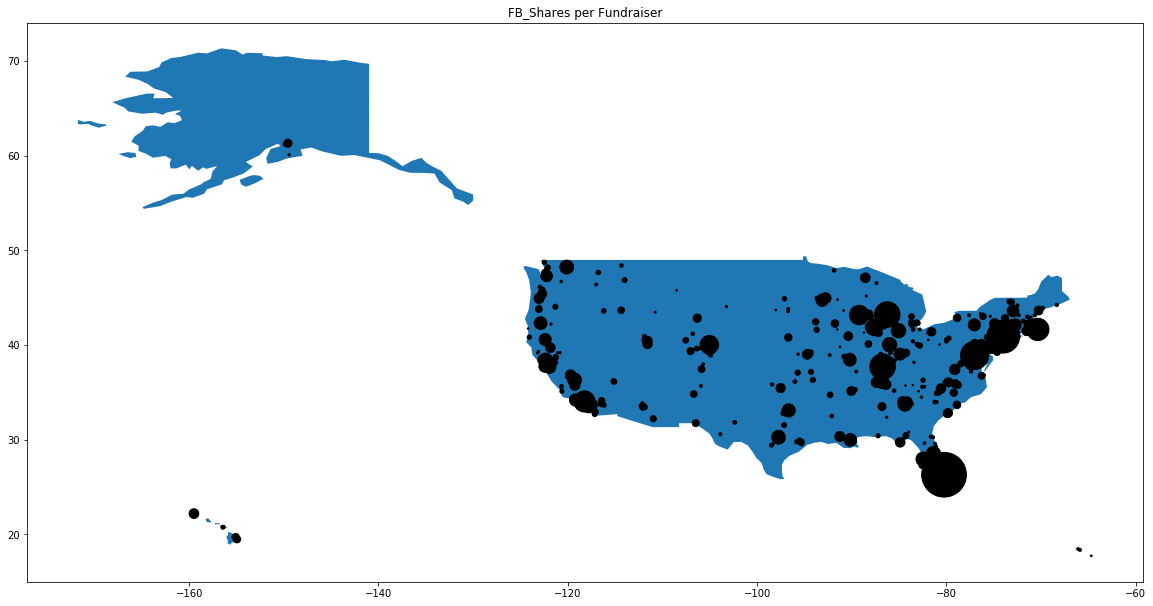

In [170]:
base = us.plot(figsize = (20,20))
## creating scales
x_max = gdf['FB_Shares'].max()
x_min = gdf['FB_Shares'].min()
max_size = 2000
min_size = 2
## adding circles
gdf.plot(ax=base, marker='o', color='black', markersize=min_size + (max_size-min_size)*(gdf['FB_Shares']/x_max));
plt.title('FB_Shares per Fundraiser')